**Criando um Novo Notebook no Google Colab**

Importe as Bibliotecas Necessárias

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


Carregue e Pré-processe o Dataset

In [2]:
# Definindo tamanho das imagens
IMG_SIZE = (160, 160)

# Função para redimensionar e normalizar as imagens
def preprocess_image(image, label):
    image = tf.image.resize(image, IMG_SIZE) / 255.0  # Normaliza para [0, 1]
    return image, label

# Carregar o dataset (usando 80% para treino e 20% para teste)
(ds_train, ds_test), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

# Aplicar o pré-processamento e configurar o pipeline
ds_train = ds_train.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.CLSGV7_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


** Configuração do Modelo com Transfer Learning**

In [5]:
# Carregar o MobileNetV2 sem as camadas finais (include_top=False)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Congela as camadas do MobileNetV2

# Criar o modelo final
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Saída para classificação binária
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Passo 5: Treine o Modelo

In [10]:
history = model.fit(ds_train, validation_data=ds_test, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 531s 913ms/step - accuracy: 0.9802 - loss: 0.0564 - val_accuracy: 0.9800 - val_loss: 0.0583
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 524s 849ms/step - accuracy: 0.9826 - loss: 0.0507 - val_accuracy: 0.9800 - val_loss: 0.0577
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 528s 907ms/step - accuracy: 0.9843 - loss: 0.0468 - val_accuracy: 0.9796 - val_loss: 0.0579
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 528s 907ms/step - accuracy: 0.9850 - loss: 0.0438 - val_accuracy: 0.9798 - val_loss: 0.0583
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 529s 909ms/step - accuracy: 0.9863 - loss: 0.0412 - val_accuracy: 0.9794 - val_loss: 0.0590


146/146 ━━━━━━━━━━━━━━━━━━━━ 97s 666ms/step - accuracy: 0.9817 - loss: 0.0515
Acurácia no teste: 0.98


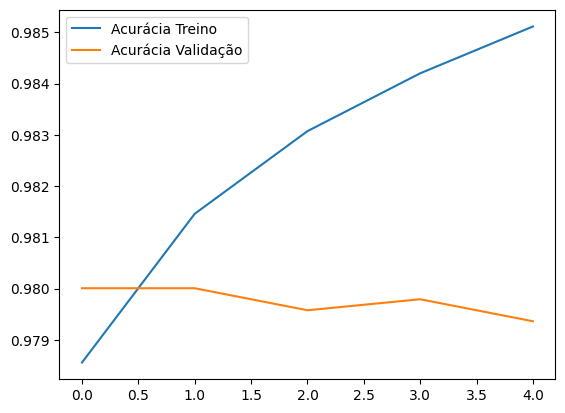

In [11]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(ds_test)
print(f"Acurácia no teste: {test_acc:.2f}")

# Plot do histórico de treinamento
plt.plot(history.history["accuracy"], label="Acurácia Treino")
plt.plot(history.history["val_accuracy"], label="Acurácia Validação")
plt.legend()
plt.show()


In [12]:
model.save("modelo_transfer_learning.h5")


In [13]:
# Se necessário, instale o Git (geralmente já vem instalado)
!apt-get install git -qq

# Configure seu usuário e e-mail (substitua com suas informações)
!git config --global user.email "laurindocakoyi@gmail.com"
!git config --global user.name "Laurindocak"


In [26]:
!git clone https://github.com/Laurindocak/transfer_learning00

Cloning into 'transfer_learning00'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [18]:
# Se o notebook estiver em /content/transfer_learning.ipynb, copie para a pasta clonada
!cp /content/transfer_learning00.ipynb transfer-learning/


cp: cannot stat '/content/transfer_learning00.ipynb': No such file or directory


In [20]:
%%writefile transfer_learning00/README.md
# Transfer Learning com TensorFlow

Este projeto demonstra a aplicação de **Transfer Learning** para classificar imagens de gatos e cachorros utilizando o modelo **MobileNetV2**.

## Tecnologias Utilizadas
- Python
- TensorFlow
- Google Colab
- Git & GitHub

## Instruções para Uso
1. Clone o repositório:


Overwriting transfer_learning00/README.md


In [22]:
!pip freeze | grep -E 'tensorflow|matplotlib|tensorflow-datasets' > transfer_learning00/requirements.txt


In [37]:
%cd transfer_learning00


/content/transfer_learning00/transfer_learning00
